In [14]:
%run ./ipy_setup.py
%matplotlib inline

In [79]:
sequences = dict( (s.name, s) for s in ht.FastaReader("/hpc/users/neffr01/jason_new/contig_000000F.fa") )


In [4]:
motifs_in = open('/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_re_000000F/ipds/hg002_ipds_priors_merged_000000F.sort.dedup.tsv', 'rb')
motif_dict = dict()
pbar = ProgressBar(3201285)
for line in motifs_in:
    pbar.animate()
    motif,data = line.strip('\n').split('\t')
    motif_dict[motif] = data

[*****************98%***************** ]  3122145 of 3201285 complete Elapsed: 0.7 minutes	 Remaining: 0.0 minutes


In [156]:
import pysam

In [183]:
vcf_file = "/hpc/users/neffr01/jason_new/trio_analysis/aj_trio_phasebytrans.phased-trio.vcf.gz"
vcfr = pysam.TabixFile(vcf_file, 'r')
pbar = ProgressBar(len(ipd_sig_sites))
sig_sites_no_variant = []
for a,i in ipd_sig_sites.iterrows():
    pbar.animate()
    pos = int(i[1])
    variant = vcfr.fetch(reference='000000F', start=pos-5, end=pos+6)
    variant = list(variant)
    if len(variant) != 0:
        continue
    else:
        sig_sites_no_variant.append(i)

[*****************97%***************** ]  95258 of 98310 complete Elapsed: 1.8 minutes	 Remaining: 0.1 minutes


In [184]:
len(sig_sites_no_variant)

89607

In [185]:
sort_sig_novar = sorted(sig_sites_no_variant, key=lambda x: x[1])

In [187]:
pd.DataFrame(sort_sig_novar).to_csv("/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_qv13_methyl_sig_sites-novariant-11mer.tsv", sep=' ', header=None, index=None)

In [181]:
ipd_sig_sites = pd.read_csv('/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_qv13_methyl_sig_sites.tsv', 
                            sep=' ', header=None, names=['chrom', 'pos', 'hap1mean', 'hap2mean'])


In [151]:
sig_motifs = dict()
pbar = ProgressBar(len(ipd_sig_sites))
for a,i in ipd_sig_sites.iterrows():
    pbar.animate()
    pos = int(i[1]) - 1
    #print pos
    motif_site = str(sequences['000000F'][pos-2:pos+3])
    if motif_site in sig_motifs:
        sig_motifs[motif_site] += 1
    else:
        sig_motifs[motif_site] = 1

[*****************83%************      ]  62498 of 75168 complete Elapsed: 0.2 minutes	 Remaining: 0.0 minutes


In [128]:
# 1-mers
list_sig = [(k,v) for k,v in sig_motifs.iteritems()]
sorted(list_sig, key=lambda x:x[1], reverse=True)

[('A', 21207), ('T', 20866), ('G', 13322), ('C', 13020)]

In [125]:
# 3-mers
list_sig = [(k,v) for k,v in sig_motifs.iteritems()]
sorted(list_sig, key=lambda x:x[1], reverse=True)

[('AAA', 2927),
 ('TTT', 2741),
 ('AAT', 1864),
 ('ATT', 1862),
 ('TAA', 1686),
 ('TCT', 1628),
 ('AGA', 1600),
 ('ATA', 1583),
 ('TAT', 1551),
 ('TTA', 1475),
 ('TTC', 1468),
 ('AAG', 1445),
 ('GAA', 1430),
 ('ATG', 1419),
 ('CTT', 1414),
 ('TTG', 1411),
 ('TGT', 1405),
 ('TGA', 1403),
 ('CTG', 1398),
 ('TCA', 1387),
 ('ACA', 1337),
 ('CAG', 1291),
 ('CAT', 1267),
 ('CAA', 1249),
 ('CCA', 1217),
 ('AGG', 1191),
 ('TGG', 1183),
 ('CCT', 1107),
 ('CTC', 1096),
 ('AGT', 1091),
 ('GAG', 1064),
 ('ACT', 1039),
 ('CAC', 1039),
 ('AAC', 1031),
 ('TCC', 1000),
 ('TGC', 984),
 ('GTG', 960),
 ('GTT', 958),
 ('GGA', 949),
 ('TAG', 923),
 ('ATC', 909),
 ('AGC', 897),
 ('GAT', 891),
 ('GCA', 868),
 ('TAC', 855),
 ('GCT', 816),
 ('CCC', 811),
 ('CTA', 809),
 ('GGG', 747),
 ('GGC', 732),
 ('GGT', 709),
 ('ACC', 708),
 ('GTA', 697),
 ('GCC', 680),
 ('GAC', 619),
 ('GTC', 597),
 ('CGG', 109),
 ('ACG', 104),
 ('CGT', 104),
 ('CCG', 98),
 ('GCG', 86),
 ('CGA', 85),
 ('CGC', 77),
 ('TCG', 76)]

In [152]:
# 5-mers
list_sig = [(k,v) for k,v in sig_motifs.iteritems()]
sorted(list_sig, key=lambda x:x[1], reverse=True)

[('AAAAA', 529),
 ('TTTTT', 414),
 ('ATTTT', 346),
 ('AAAAT', 336),
 ('TATTT', 281),
 ('ATAAA', 268),
 ('AAATA', 259),
 ('TTTTA', 259),
 ('TTTCT', 254),
 ('TTTAT', 248),
 ('TAAAA', 247),
 ('TTCTT', 246),
 ('TAAAT', 236),
 ('AGAAA', 232),
 ('TTTTC', 230),
 ('ATATT', 228),
 ('AATTT', 225),
 ('CATTT', 222),
 ('ATATA', 220),
 ('TCTTT', 217),
 ('AATAA', 214),
 ('TTTGT', 213),
 ('CAAAA', 212),
 ('AAATG', 209),
 ('TTATT', 206),
 ('TATAT', 205),
 ('GAAAA', 203),
 ('CTTTT', 203),
 ('ATTAT', 203),
 ('TTTCA', 200),
 ('AAATT', 196),
 ('TGTTT', 196),
 ('ATTTA', 196),
 ('AAAAG', 194),
 ('AAACA', 194),
 ('ATAAT', 192),
 ('AAAGA', 192),
 ('TTTTG', 188),
 ('TTAAA', 188),
 ('AAGAA', 183),
 ('TTTAA', 181),
 ('AATAT', 180),
 ('TGTGT', 178),
 ('TTCCT', 177),
 ('CAGAA', 176),
 ('TCTCT', 175),
 ('AAGGA', 173),
 ('AATTA', 173),
 ('TGAAA', 172),
 ('TCATT', 171),
 ('ACAAA', 171),
 ('ACACA', 170),
 ('ATTTG', 168),
 ('GTTTT', 168),
 ('TTCTC', 165),
 ('ACATT', 162),
 ('AACAA', 161),
 ('AGAGA', 160),
 ('AAGCA', 158

[*****************98%***************** ]  32737413 of 33310340 complete Elapsed: 2.6 minutes	 Remaining: 0.0 minutes

(array([ 316.,  468.,  178.,   30.,   22.,    6.,    2.,    0.,    0.,    2.]),
 array([    590. ,   22609.4,   44628.8,   66648.2,   88667.6,  110687. ,
         132706.4,  154725.8,  176745.2,  198764.6,  220784. ]),
 <a list of 10 Patch objects>)

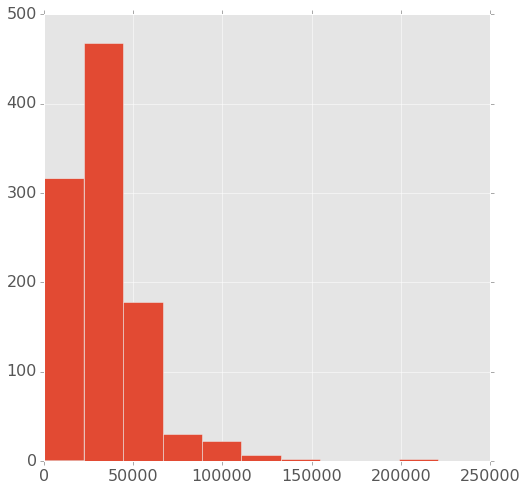

In [133]:
currseq = str(sequences['000000F'])
from collections import Counter
kmerBack = Counter()
k = 5
pbar = ProgressBar(len(currseq)-k)
for i in range(len(currseq)-k):
    pbar.animate()
    kmerBack[currseq[i:i+5]] += 1
plt.hist(kmerBack.values())

In [148]:
kmerBack['CGCGG']

1695

In [135]:
list_kmer = [(k,v) for k,v in kmerBack.iteritems()]
sorted(list_kmer, key=lambda x:x[1], reverse=True)

[('AAAAA', 220784),
 ('TTTTT', 216810),
 ('ATTTT', 148822),
 ('AAAAT', 148533),
 ('TATTT', 125755),
 ('AAATA', 125733),
 ('TAAAA', 122681),
 ('TTTTA', 122265),
 ('TTTCT', 112633),
 ('AGAAA', 111775),
 ('ATAAA', 106136),
 ('TTTAT', 105239),
 ('AAATT', 104603),
 ('AATTT', 104382),
 ('TTAAA', 102568),
 ('TTTAA', 102493),
 ('AATAA', 101928),
 ('TTATT', 100969),
 ('TTTTC', 97804),
 ('GAAAA', 97277),
 ('TTCTT', 92472),
 ('AAGAA', 91641),
 ('TCTTT', 91604),
 ('CAAAA', 91478),
 ('TTTTG', 90986),
 ('AAAGA', 90848),
 ('ATATA', 90260),
 ('TATAT', 89888),
 ('AATAT', 89470),
 ('ATATT', 89317),
 ('AAAAG', 88756),
 ('TAAAT', 88747),
 ('CATTT', 88642),
 ('CTTTT', 88433),
 ('ATTTA', 88084),
 ('AAATG', 87988),
 ('AAACA', 84715),
 ('TGTTT', 83971),
 ('TGAAA', 82721),
 ('TTTCA', 82564),
 ('ACAAA', 81797),
 ('TTTGT', 81391),
 ('TAATT', 76791),
 ('AATTA', 76668),
 ('AAAAC', 74147),
 ('ATAAT', 74126),
 ('GTTTT', 73800),
 ('ATTAT', 73209),
 ('TCTCT', 70454),
 ('ATTTC', 70045),
 ('ATTAA', 69880),
 ('TTAAT', 69

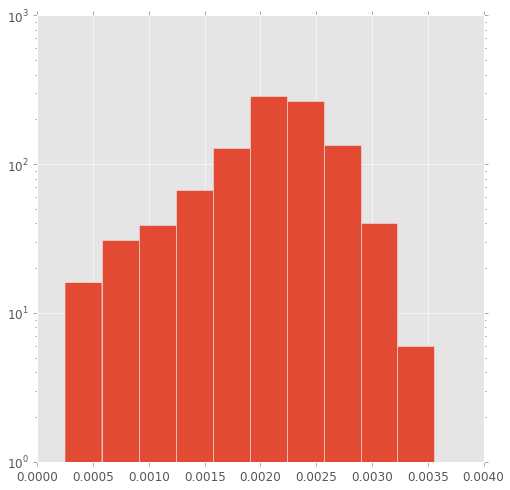

In [153]:
rcParams['font.size'] = 12
norm5mers = {}
for k,v in sig_motifs.iteritems():
    norm5mers[k] = v/float(kmerBack[k])
list_sig_norm = [(k,v) for k,v in norm5mers.iteritems()]
sort_list_sig_norm = sorted(list_sig_norm, key=lambda x:x[1], reverse=True)
plt.hist([i[1] for i in sort_list_sig_norm], log=True)
plt.show()

In [147]:
sig_motifs['GTGCG']

11

In [154]:
sort_list_sig_norm

[('CGATA', 0.0035598705501618125),
 ('AAGGC', 0.0035530990919857876),
 ('GAGGG', 0.0034935718278367805),
 ('GCCCA', 0.00328844889058119),
 ('TTCGC', 0.003266906239790918),
 ('CGAGT', 0.003251277287505806),
 ('GAAGT', 0.003226340172071476),
 ('ACCTC', 0.0032259055577744324),
 ('ACCCA', 0.003198939450704631),
 ('AGGGC', 0.0031953020424025217),
 ('ACTCG', 0.0031919744642042863),
 ('CGGCC', 0.0031763826606875933),
 ('CCCGC', 0.0031290263206331676),
 ('GCTGG', 0.0031226521412471824),
 ('CAAGC', 0.0031211467324291),
 ('AAGGA', 0.003101247669582676),
 ('GCCCG', 0.0030959752321981426),
 ('AAGCA', 0.0030948836480451302),
 ('CTAGC', 0.0030891700825758928),
 ('ATGGG', 0.0030824796836566304),
 ('GCACT', 0.0030748568601116845),
 ('CTAAC', 0.0030679257945448444),
 ('AGATT', 0.0030623833860631135),
 ('CCTCC', 0.003049040511727079),
 ('ATCGA', 0.0030441400304414),
 ('AGGCC', 0.0030387055114521216),
 ('ACTGA', 0.0030337875859369266),
 ('CTTGC', 0.0030096739519885345),
 ('CATCA', 0.00299523159130664),
 

In [73]:
ipd_inter_sig_dist = np.diff(ipd_sig_sites['pos'])

In [74]:
pd.set_option('display.width', 900)
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
rcParams['figure.figsize'] = (8, 8)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'Bitstream Vera Sans'

In [75]:
#print np.logspace(0.1,2,50)

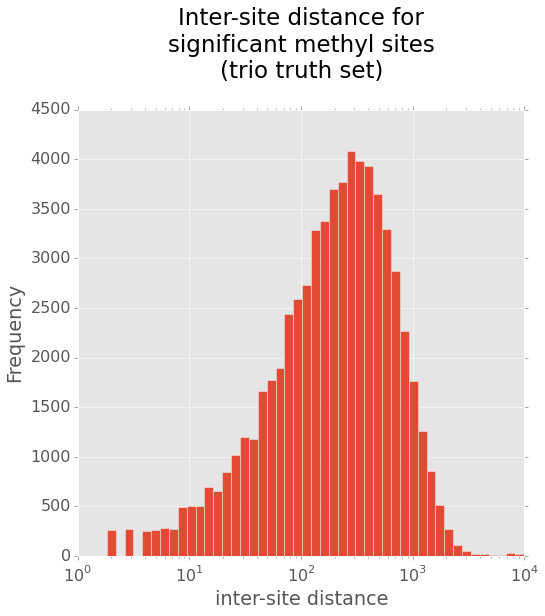

In [76]:
plt.title('Inter-site distance for\nsignificant methyl sites\n(trio truth set)\n')
plt.hist(ipd_inter_sig_dist, bins=np.logspace(0.1,4,50))
plt.xscale('log')
plt.xlabel('inter-site distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# TODO: what are the center bases for these sites?

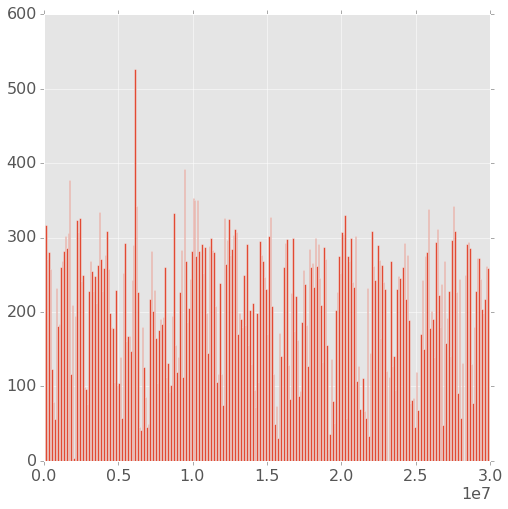

In [78]:
plt.hist(ipd_sig_sites['pos'], bins=range(0,30000000,100000))
plt.show()

In [69]:
list(ipd_sig_sites['pos'])[-1]

24265329